#### Importing libraries

In [1]:
import pandas as pd # for data manipulation
import glob # for reading files in a random order
import matplotlib.pyplot as plt #for plotting
import matplotlib.dates as mdates
import talipp as ta
from talipp.indicators import ADX
import talib as tb
import math as mth
import numpy as np
# importing the random module
import random
import lightgbm as lgb
import sklearn.metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import optuna



c:\Users\janic\anaconda3\envs\IAPT\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Accessing the databases

In [2]:
#Getting a CSV files list from a folder
file_path1 = './Datasets/AAPL.csv'

#Reading all CSV files in a list
appleDb = pd.read_csv(file_path1)
#print(appleDb.to_string()) - to view the original dataframe

# Convert Date column to datetime object
appleDb['Date'] = pd.to_datetime(appleDb['Date'], utc= True) #set the utc parameter to True to ensure that the timezone information is preserved

# Filter rows based on condition - starting from the year 2010
appleDb = appleDb[pd.to_datetime(appleDb['Date']).dt.year >= 2009]

print(appleDb.to_string())



                           Date        Open        High         Low       Close      Volume  Dividends  Stock Splits
7079  2009-01-02 05:00:00+00:00    2.610502    2.767351    2.588616    2.758535   746015200   0.000000           0.0
7080  2009-01-05 05:00:00+00:00    2.832097    2.923592    2.818114    2.874956  1181608400   0.000000           0.0
7081  2009-01-06 05:00:00+00:00    2.916600    2.953684    2.808386    2.827536  1289310400   0.000000           0.0
7082  2009-01-07 05:00:00+00:00    2.790756    2.811729    2.743640    2.766438   753048800   0.000000           0.0
7083  2009-01-08 05:00:00+00:00    2.748809    2.831489    2.736953    2.817810   673500800   0.000000           0.0
7084  2009-01-09 05:00:00+00:00    2.833313    2.838480    2.739993    2.753368   546845600   0.000000           0.0
7085  2009-01-12 05:00:00+00:00    2.749720    2.765831    2.661265    2.695006   617716400   0.000000           0.0
7086  2009-01-13 05:00:00+00:00    2.682239    2.727834    2.624

In [3]:
#Getting a CSV files list from a folder
file_path2 = './Datasets/AAL.csv'

#Reading all CSV files in a list
americanAirlineDb = pd.read_csv(file_path2)
#print(americanAirlineDb.to_string())

# Convert Date column to datetime object
americanAirlineDb['Date'] = pd.to_datetime(americanAirlineDb['Date'], utc= True) #set the utc parameter to True to ensure that the timezone information is preserved

# Filter rows based on condition - starting from the year 2010
americanAirlineDb = americanAirlineDb[pd.to_datetime(americanAirlineDb['Date']).dt.year >= 2010]

print(americanAirlineDb.to_string())

                          Date       Open       High        Low      Close     Volume  Dividends  Stock Splits
1074 2010-01-04 05:00:00+00:00   4.562868   4.657142   4.393175   4.496876    9837300        0.0           0.0
1075 2010-01-05 05:00:00+00:00   4.515733   5.062523   4.440314   5.005959   25212000        0.0           0.0
1076 2010-01-06 05:00:00+00:00   4.892829   5.071950   4.713708   4.798555   16597900        0.0           0.0
1077 2010-01-07 05:00:00+00:00   4.770271   5.119086   4.760844   4.939965   14033400        0.0           0.0
1078 2010-01-08 05:00:00+00:00   4.968248   5.119086   4.770272   4.845691   12760000        0.0           0.0
1079 2010-01-11 05:00:00+00:00   4.836264   4.930538   4.657143   4.751417   10952900        0.0           0.0
1080 2010-01-12 05:00:00+00:00   4.770273   4.855119   4.675998   4.789127    7870300        0.0           0.0
1081 2010-01-13 05:00:00+00:00   4.826836   5.185077   4.732562   5.166223   16400500        0.0           0.0
1

In [4]:
#Getting a CSV files list from a folder
file_path3 = './Datasets/APA.csv'

#Reading all CSV files in a list
apacheCorpDb = pd.read_csv(file_path3)
#print(apacheCorpDb.to_string())

# Convert Date column to datetime object
apacheCorpDb['Date'] = pd.to_datetime(apacheCorpDb['Date'], utc= True) #set the utc parameter to True to ensure that the timezone information is preserved

# Filter rows based on condition - starting from the year 2010
apacheCorpDb = apacheCorpDb[pd.to_datetime(apacheCorpDb['Date']).dt.year >= 2010]

print(apacheCorpDb.to_string())

                           Date        Open        High         Low       Close    Volume  Dividends  Stock Splits
7731  2010-01-04 05:00:00+00:00   85.830924   87.074136   85.495580   86.591576   2364900      0.000           0.0
7732  2010-01-05 05:00:00+00:00   86.681527   87.646654   86.076273   87.613937   2464500      0.000           0.0
7733  2010-01-06 05:00:00+00:00   87.335874   89.086189   86.836951   88.988045   2894500      0.000           0.0
7734  2010-01-07 05:00:00+00:00   88.595451   88.595451   86.845135   87.638504   2412200      0.000           0.0
7735  2010-01-08 05:00:00+00:00   86.787898   87.352254   85.790053   87.180489   4106000      0.000           0.0
7736  2010-01-11 05:00:00+00:00   87.883855   88.521826   86.591570   87.442192   2352600      0.000           0.0
7737  2010-01-12 05:00:00+00:00   86.199000   87.041441   85.683722   86.117210   3003100      0.000           0.0
7738  2010-01-13 05:00:00+00:00   85.487415   87.597611   85.192975   87.368599 

The dataset contains the following stock prices for 
- AAPL which stands for the Apple Inc. company. 
- AAL which stands for the American Airlines Group Inc. for Major Airlines
- APA which stands for the Apache Corporation for independent oil and gas

This dataset contains the following information:

Date: This is the date that the stock market was open (i.e. the day that the stock was traded). It's usually listed in a format like "MM/DD/YYYY" (month/day/year).

Open: This is the price at which the stock opened for trading on that particular day. It's the price that the first trade was made at.

High: This is the highest price that the stock reached during trading on that day.

Low: This is the lowest price that the stock reached during trading on that day.

Close: This is the price at which the stock closed for trading on that particular day. It's the price that the last trade was made at.

Volume: This is the total number of shares that were traded on that particular day. It's a measure of how active the market was for that stock on that day.

Dividends: These are payments that companies sometimes make to their shareholders as a way of distributing profits. They're usually paid out on a regular basis (e.g. quarterly) and are typically a percentage of the company's earnings.

Stock Splits: This is when a company decides to divide its existing shares into multiple shares. For example, if a company had 1 million shares outstanding and decided to do a 2-for-1 stock split, there would then be 2 million shares outstanding, but each share would be worth half as much as before. Companies often do stock splits to make their shares more affordable to individual investors.

#### Converting the prices into logs representation

In [5]:
#checking how all the columns are listed in the dataframe
appleDb.columns
americanAirlineDb.columns
apacheCorpDb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [6]:
#checking how all the rows are listed in the dataframe
appleDb.index
americanAirlineDb.index
apacheCorpDb.index


Int64Index([ 7731,  7732,  7733,  7734,  7735,  7736,  7737,  7738,  7739,
             7740,
            ...
            11064, 11065, 11066, 11067, 11068, 11069, 11070, 11071, 11072,
            11073],
           dtype='int64', length=3343)

In [7]:
print(appleDb.to_string())


def changeValuesIntoLogs(df):
    df['Open'] = df['Open'].apply(lambda x: mth.log(x))
    df['High'] = df['High'].apply(lambda x: mth.log(x))
    df['Low'] = df['Low'].apply(lambda x: mth.log(x))
    df['Close'] = df['Close'].apply(lambda x: mth.log(x))
    return df

appleDb = changeValuesIntoLogs(appleDb)

                           Date        Open        High         Low       Close      Volume  Dividends  Stock Splits
7079  2009-01-02 05:00:00+00:00    2.610502    2.767351    2.588616    2.758535   746015200   0.000000           0.0
7080  2009-01-05 05:00:00+00:00    2.832097    2.923592    2.818114    2.874956  1181608400   0.000000           0.0
7081  2009-01-06 05:00:00+00:00    2.916600    2.953684    2.808386    2.827536  1289310400   0.000000           0.0
7082  2009-01-07 05:00:00+00:00    2.790756    2.811729    2.743640    2.766438   753048800   0.000000           0.0
7083  2009-01-08 05:00:00+00:00    2.748809    2.831489    2.736953    2.817810   673500800   0.000000           0.0
7084  2009-01-09 05:00:00+00:00    2.833313    2.838480    2.739993    2.753368   546845600   0.000000           0.0
7085  2009-01-12 05:00:00+00:00    2.749720    2.765831    2.661265    2.695006   617716400   0.000000           0.0
7086  2009-01-13 05:00:00+00:00    2.682239    2.727834    2.624

In [8]:
print("After converting with logs")


After converting with logs


In [9]:
print(appleDb.to_string())

                           Date      Open      High       Low     Close      Volume  Dividends  Stock Splits
7079  2009-01-02 05:00:00+00:00  0.959542  1.017891  0.951123  1.014700   746015200   0.000000           0.0
7080  2009-01-05 05:00:00+00:00  1.041017  1.072813  1.036068  1.056037  1181608400   0.000000           0.0
7081  2009-01-06 05:00:00+00:00  1.070418  1.083053  1.032610  1.039406  1289310400   0.000000           0.0
7082  2009-01-07 05:00:00+00:00  1.026313  1.033800  1.009286  1.017561   753048800   0.000000           0.0
7083  2009-01-08 05:00:00+00:00  1.011168  1.040803  1.006845  1.035960   673500800   0.000000           0.0
7084  2009-01-09 05:00:00+00:00  1.041447  1.043269  1.007956  1.012825   546845600   0.000000           0.0
7085  2009-01-12 05:00:00+00:00  1.011499  1.017341  0.978801  0.991400   617716400   0.000000           0.0
7086  2009-01-13 05:00:00+00:00  0.986652  1.003508  0.965000  0.980627   798397600   0.000000           0.0
7087  2009-01-14 05

#### Graphs Representations

Open Graphs - The opening price of the stock on that day. This helps to identify trends in the stock's price and evaluate whether the stock is undervalued or overvalued.

In [10]:
# #plotting the closing price of the stocks

# # create a figure and axis objects with 3 rows and 1 column
# fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# # plot the open prices for each company on each axis object
# axs[0].plot(appleDb['Date'], appleDb['Open'])
# axs[0].set_title('Apple Db')
# axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['Open'])
# axs[1].set_title('American Airline Db')
# axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['Open'])
# axs[2].set_title('Apache Corp Db')

# # adjust the space between subplots
# plt.subplots_adjust(hspace=0.5)

# # add a common x-label and y-label to the collage
# fig.text(0.5, 0.04, 'Date', ha='center')
# fig.text(0.04, 0.5, 'Open', va='center', rotation='vertical')

# # display the plot
# plt.show()

High Graphs - The highest price the stock reached during the day. This helps to identify how volatile the stock is and how much potential upside there is.

In [11]:
# #plotting the closing price of the stocks

# # create a figure and axis objects with 3 rows and 1 column
# fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# # plot the high prices for each company on each axis object
# axs[0].plot(appleDb['Date'], appleDb['High'])
# axs[0].set_title('Apple Db')
# axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['High'])
# axs[1].set_title('American Airline Db')
# axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['High'])
# axs[2].set_title('Apache Corp Db')

# # adjust the space between subplots
# plt.subplots_adjust(hspace=0.5)

# # add a common x-label and y-label to the collage
# fig.text(0.5, 0.04, 'Date', ha='center')
# fig.text(0.04, 0.5, 'High', va='center', rotation='vertical')

# # display the plot
# plt.show()

Low Graphs -  The lowest price the stock reached during the day. This helps you evaluate how risky the stock is and how much potential downside there is.

In [12]:
# #plotting the closing price of the stocks

# # create a figure and axis objects with 3 rows and 1 column
# fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# # plot the low prices for each company on each axis object
# axs[0].plot(appleDb['Date'], appleDb['Low'])
# axs[0].set_title('Apple Db')
# axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['Low'])
# axs[1].set_title('American Airline Db')
# axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['Low'])
# axs[2].set_title('Apache Corp Db')

# # adjust the space between subplots
# plt.subplots_adjust(hspace=0.5)

# # add a common x-label and y-label to the collage
# fig.text(0.5, 0.04, 'Date', ha='center')
# fig.text(0.04, 0.5, 'Low', va='center', rotation='vertical')

# # display the plot
# plt.show()

Closing Graphs - The closing price of the stock on that day. This can helps to evaluate how the stock performed over the course of the day and whether it ended up in positive or negative territory.

In [13]:
# #plotting the closing price of the stocks

# # create a figure and axis objects with 3 rows and 1 column
# fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# # plot the close prices for each company on each axis object
# axs[0].plot(appleDb['Date'], appleDb['Close'])
# axs[0].set_title('Apple Db')
# axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['Close'])
# axs[1].set_title('American Airline Db')
# axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['Close'])
# axs[2].set_title('Apache Corp Db')

# # adjust the space between subplots
# plt.subplots_adjust(hspace=0.5)

# # add a common x-label and y-label to the collage
# fig.text(0.5, 0.04, 'Date', ha='center')
# fig.text(0.04, 0.5, 'Closing', va='center', rotation='vertical')

# # display the plot
# plt.show()

Volume Graphs - The total number of shares of the stock that were traded on that day. This helps to evaluate how active the market is for the stock and how much interest there is from other investors.

In [14]:
# #plotting the closing price of the stocks

# # create a figure and axis objects with 3 rows and 1 column
# fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# # plot the close prices for each company on each axis object
# axs[0].plot(appleDb['Date'], appleDb['Volume'])
# axs[0].set_title('Apple Db')
# axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['Volume'])
# axs[1].set_title('American Airline Db')
# axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['Volume'])
# axs[2].set_title('Apache Corp Db')

# # adjust the space between subplots
# plt.subplots_adjust(hspace=0.5)

# # add a common x-label and y-label to the collage
# fig.text(0.5, 0.04, 'Date', ha='center')
# fig.text(0.04, 0.5, 'Volume', va='center', rotation='vertical')

# # display the plot
# plt.show()

#### Adding extra features into the dataframe to help the AI stock advisor to make better predictions. 

In [15]:
def priceChange(df):
    df['Price Change'] = df['Close'] - df['Close'].shift(1) #taking the closing price of the current day and subtracting it from the closing price of the previous day
    return df


appleDb = priceChange(appleDb) 

By adding the Price Change in the data frame it will illustrate the percentage change between the previous closing price (of the previous day) and closing price of that day for each day. This can provide insight into the daily market sentiment of the stock. The reason for this is that the difference between the previous closing price and the closing price for a given day provides a good indication of the direction and magnitude of price movements for that day.

In [16]:
def priceVolatility(df):
    df['Price Volatility'] = df['High'] - df['Low'] #taking the high price of the day and subtracting it from the low price of the day
    return df

appleDb = priceVolatility(appleDb)


By adding the Price Volatility to the dataframe it refers to how much the price of a stock moves up and down over a certain period. The more a stock's price fluctuates (changes frequently), the higher its volatility. 

Note that the Volatility means the amount of uncertainty or risk related to the size of changes in a security's value

Volatility can be caused by various factors, such as changes in market conditions, news events, or investor sentiment. High volatility can indicate that the stock is more risky or uncertain, while low volatility can suggest that the stock is more stable and predictable. 

To work out the volatility of a stock taking the difference between the high and low prices of a stock. As stated before, the higher the difference, the more volatility. 

In [17]:
#calculating the SMA for the closing price of the stocks

def SMA(df,windowValue):
    df['SMA'] = tb.SMA(df['Close'], windowValue)
    return df

appleDb = SMA(appleDb, 10)

In [18]:
def TEMA(df,windowValue):
    df['EMA'] = tb.EMA(df['Close'], windowValue)
    return df

appleDb = TEMA(appleDb, 10)




In [19]:
# # Plot SMA vs Closing Price
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
# ax1.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
# ax1.plot(appleDb['Date'],appleDb['SMA'], label='SMA')
# ax1.set_title('SMA vs Closing Price')
# ax1.legend()

# # Plot TEMA vs Closing Price
# ax2.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
# ax2.plot(appleDb['Date'],appleDb['TEMA'], label='TEMA')
# ax2.set_title('TEMA vs Closing Price')
# ax2.legend()

# plt.tight_layout()
# plt.show()

Moving Averages: 


Moving averages are a trend-following indicator that smooths out price fluctuations over a given period of time. They can be used to identify trends and potential reversal points in the stock's price.

The Simple Moving Average (SMA) is useful as it is a way to calculate the average price of a stock over a specific period of time. For example, if you want to calculate the SMA over the last 10 days, you would add up the prices of the stock from each of the last 10 days and divide that sum by 10.

The SMA is called "moving" because as each new day's price is added to the calculation, the oldest price is dropped, and the SMA "moves" to reflect the new set of prices.

The SMA can help to smooth out the daily fluctuations in the stock price and give you a better idea of the overall trend. If the SMA is moving up, it means that the stock price is generally increasing, and if the SMA is moving down, it means that the stock price is generally decreasing.

the simple moving average (SMA) is a calculation that helps to identify trends in the price of a stock over a specific time period. It is calculated by adding up the prices over a certain number of days, and then dividing by the number of days.

For example, if you want to calculate the 20-day SMA, you would add up the closing prices for the past 20 days and then divide by 20.

 The closing price is used because it is the final price of a trading day and is considered to be the most important price point for that day. Using closing prices over a period of time helps to reduce the impact of short-term price fluctuations and provides a more accurate picture of the trend over that time period.

The TEMA moving average is a technical analysis indicator that uses a triple exponential moving average to reduce the lag of the standard exponential moving average (EMA).

To calculate the TEMA, you first calculate a single EMA for a given period, then you calculate a second EMA of that first EMA, and then a third EMA of that second EMA. The formula for the TEMA is:

TEMA = 3 * (EMA1 - EMA2) + EMA3

where EMA1 is the first EMA, EMA2 is the second EMA of the first EMA, and EMA3 is the third EMA of the second EMA.

In [20]:
def ADX(df):
    df['ADX5'] = tb.ADX(df['High'],df['Low'], df['Close'], timeperiod=5)
    df['ADX10'] = tb.ADX(df['High'],df['Low'], df['Close'], timeperiod=10)
    df['ADX20'] = tb.ADX(df['High'],df['Low'], df['Close'], timeperiod=20)
    return df

appleDb = ADX(appleDb)


# Plot Various ADX values
# fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10,8))
# ax1.plot(appleDb['Date'],appleDb['High'], label='High Price')
# ax1.plot(appleDb['Date'],appleDb['Low'], label='Low Price')
# ax1.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
# ax1.plot(appleDb['Date'],appleDb['ADX20'], label='ADX20')
# ax1.set_title('ADX20')
# ax1.legend()

# ax2.plot(appleDb['Date'],appleDb['High'], label='High Price')
# ax2.plot(appleDb['Date'],appleDb['Low'], label='Low Price')
# ax2.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
# ax2.plot(appleDb['Date'],appleDb['ADX10'], label='ADX10')
# ax2.set_title('ADX10')
# ax2.legend()

# ax3.plot(appleDb['Date'],appleDb['High'], label='High Price')
# ax3.plot(appleDb['Date'],appleDb['Low'], label='Low Price')
# ax3.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
# ax3.plot(appleDb['Date'],appleDb['ADX5'], label='ADX5')
# ax3.set_title('ADX5')
# ax3.legend()

# plt.tight_layout()
# plt.show()

Average Directional Movement Index(Momentum Indicator)

ADX can be used to help measure the overall strength of a trend. The ADX indicator is an average of expanding price range values. The Average Directional Movement Index (ADX) is a technical indicator that is based on the high, low, and close prices of a stock. The ADX helps to measure the strength of a trend, whether it's up or down, and its overall momentum.

The ADX is calculated using a formula that takes into account the price movements over a specific period of time. The indicator is based on the difference between the high and low prices and the current closing price. The ADX is usually plotted on a chart as a line that ranges between 0 and 100, with a higher value indicating a stronger trend.

To calculate the ADX for a stock, you would first need to determine the time period for which you want to calculate the indicator. This can vary depending on your strategy and the volatility of the stock you are analyzing. Once you have determined the time period, you can then use the high, low, and close prices for that period to calculate the ADX.

In [21]:


def ATR(df):
    df['ATR5'] = tb.ATR(df['High'], df['Low'], df['Close'], timeperiod=5)
    df['ATR10'] = tb.ATR(df['High'], df['Low'], df['Close'], timeperiod=10)
    return df

appleDb = ATR(appleDb)
# ax1.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
# ax1.plot(appleDb['Date'],appleDb['High'], label='High Price')
# ax1.plot(appleDb['Date'],appleDb['Low'], label='Low Price')
# ax1.plot(appleDb['Date'],appleDb['ATR'], label='ATR',color='red')
# ax1.set_title('ATR vs Closing Price vs High Price vs Low Price')
# ax1.legend()


Average True Range (ATR): ATR is a measure of volatility that takes into account the daily price range of the stock. It can help predict potential price movement and can be useful for setting stop-loss orders.

The Average True Range (ATR) is another technical indicator that is commonly used by traders and investors to measure the volatility of a stock. While the ADX measures the strength of a trend, the ATR measures the volatility of the stock price.

The ATR is calculated using the difference between the high and low prices of a stock over a specific period of time. It takes into account any gaps or limit moves that may have occurred during that time period. The ATR is usually expressed in points or as a percentage of the stock price.

One key difference between the ADX and ATR is that the ADX is used to measure the strength of a trend, while the ATR is used to measure the volatility of the stock price. Another difference is that the ADX is calculated using the high, low, and close prices, while the ATR is calculated using only the high and low prices.

Both the ADX and ATR are useful indicators that can help traders and investors make informed decisions about buying and selling stocks. The ADX can help to identify strong trends, while the ATR can help to identify potential changes in volatility.

In [22]:
appleDb['RSI'] = tb.RSI(appleDb['Close'], timeperiod=10)

def RSI(df):
    df['RSI'] = tb.RSI(df['Close'], timeperiod=10)
    return df

appleDb = RSI(appleDb)


# appleDb[['RSI']].plot(figsize=(12,10),marker='o')
# plt.axhline(y=30, color='green', linestyle='-')
# plt.axhline(y=70, color='red', linestyle='-')
# x = np.arange(0, len(appleDb['RSI']),0.1)
# appleDb['RSI'].tail(10)
# plt.title("Apple RSI")

Relative Strength Index (RSI): an indicator used in finance to help investors and traders understand whether a stock is overbought or oversold. It is a measure of the stock's recent price changes, and is expressed as a number between 0 and 100.

The RSI works by comparing the average price gains of a stock to its average price losses over a specific time period (usually 14 days). If the average gains are higher than the average losses, the RSI will be higher, indicating that the stock is in an uptrend. If the average losses are higher than the average gains, the RSI will be lower, indicating that the stock is in a downtrend.

Traders use the RSI to identify potential buy and sell signals. When the RSI is above 70, it is considered overbought, which means that the stock may be due for a price correction. When the RSI is below 30, it is considered oversold, which means that the stock may be undervalued and due for a price increase.

In [23]:
# appleDb['Upper_BBand'], appleDb['Mid_BBand'], appleDb['Lower_BBand'] = tb.BBANDS(appleDb['Close'], timeperiod =20)
# appleDb[['Close','Mid_BBand','Upper_BBand','Lower_BBand']].plot(figsize= (12,10))
# plt.title("Apple Bollinger Bands")
# plt.show()

def bbands(df):
    df['Upper_BBand5'], df['Mid_BBand5'], df['Lower_BBand5'] = tb.BBANDS(df['Close'], timeperiod =5)
    df['Upper_BBand10'], df['Mid_BBand10'], df['Lower_BBand10'] = tb.BBANDS(df['Close'], timeperiod =10)
    return df

appleDb = bbands(appleDb)

Bollinger Bands is a tool that helps traders understand how much a stock's price tends to change over time. It consists of three lines on a chart: a middle line that represents the average price of the stock over a certain period (usually 20 days), and two additional lines that are drawn above and below the middle line.

These upper and lower lines are drawn at a distance that represents how much the stock's price has varied in the past. The distance is based on the stock's standard deviation, which is a measure of how much its price has fluctuated in the past.

When the stock's price is moving within the Bollinger Bands, it is considered to be trading within a normal range. However, when the stock's price moves above the upper line, it is considered to be overbought, meaning it may be due for a price correction. Conversely, when the stock's price moves below the lower line, it is considered to be oversold, meaning it may be due for a price increase.

Bollinger Bands can be a useful tool for traders to help identify potential buy and sell signals. 

In [24]:
# Calculate the MACD and Signal Line indicators
# appleDb["MACD"], appleDb["macd_signal"], appleDb["macd_hist"] = tb.MACD(appleDb["Close"], fastperiod=12, slowperiod=26, signalperiod=9)
# appleDb[['MACD','macd_signal','macd_hist']].plot(figsize= (12,10))
# plt.title("Apple MACD")
# plt.show()

def MACD(df):
    df["MACD"], df["macd_signal"], df["macd_hist"] = tb.MACD(df["Close"], fastperiod=5, slowperiod=20, signalperiod=9)
    return df

appleDb = MACD(appleDb)

Moving Average Convergence Divergence (MACD): The MACD is a trend-following indicator that calculates the difference between two moving averages of the stock's price. It can help identify changes in the stock's trend and can be used to generate buy or sell signals.

The MACD is a trend-following indicator that measures the difference between a short-term moving average and a long-term moving average. It is typically used with a 12-day and 26-day moving average, and a 9-day signal line.


In [25]:
# # Calculate the On Balance Volume indicator
# appleDb['OBV'] = tb.OBV(appleDb['Close'], appleDb['Volume'])
# appleDb[['OBV','Close']].plot(figsize= (12,10))
# plt.title("Apple OBV")
# plt.show()
# print(appleDb.to_string())

def OBV(df):
    df['OBV'] = tb.OBV(df['Close'], df['Volume'])
    return df

appleDb = OBV(appleDb)

On Balance Volume (OBV)

In [26]:
# # Calculate the Chaikin Money Flow indicator
# appleDb['MFI'] = tb.MFI(appleDb['High'], appleDb['Low'], appleDb['Close'], appleDb['Volume'])
# appleDb[['MFI','Close']].plot(figsize= (12,10))
# plt.title("Apple MFI")
# plt.show()
# print(appleDb.to_string())

def MFI(df):
    df['MFI'] = tb.MFI(df['High'], df['Low'], df['Close'], df['Volume'])
    return df

appleDb = MFI(appleDb)

Money Flow Index (MFI)

#### Prediction of Close Price after a certain amount of days



In [27]:
# Calculate the Chaikin Money Flow indicator
# appleDb['ClosePriceAfter10Days'] = appleDb['Close'].shift(-10)
# appleDb['ClosePriceAfter30Days'] = appleDb['Close'].shift(-30)
# appleDb['ClosePriceAfter60Days'] =appleDb['Close'].shift(-60)
# appleDb['ClosePriceAfter120Days'] = appleDb['Close'].shift(-120)
# appleDb['ClosePriceAfter365Days'] =appleDb['Close'].shift(-365)

def closePriceAfter(df):
    df['ClosePriceAfter10Days'] = df['Close'].shift(-10)
    df['ClosePriceAfter30Days'] = df['Close'].shift(-30)
    df['ClosePriceAfter60Days'] =df['Close'].shift(-60)
    df['ClosePriceAfter120Days'] = df['Close'].shift(-120)
    df['ClosePriceAfter365Days'] =df['Close'].shift(-365)
    return df

def differencePriceAfter(df):
    df['DifferenceAfter10Days'] = df['ClosePriceAfter10Days']-  df['Close']
    df['DifferenceAfter30Days'] = df['ClosePriceAfter30Days']-  df['Close']
    df['DifferenceAfter60Days'] = df['ClosePriceAfter60Days'] -  df['Close']
    df['DifferenceAfter120Days'] = df['ClosePriceAfter120Days']- df['Close']
    df['DifferenceAfter365Days'] = df['ClosePriceAfter365Days'] -  df['Close']
    return df

appleDb = closePriceAfter(appleDb)
appleDb = differencePriceAfter(appleDb)

# appleDb['DifferenceAfter10Days'] = appleDb['ClosePriceAfter10Days']-  appleDb['Close']
# appleDb['DifferenceAfter30Days'] = appleDb['ClosePriceAfter30Days']-  appleDb['Close']
# appleDb['DifferenceAfter60Days'] = appleDb['ClosePriceAfter60Days'] -  appleDb['Close']
# appleDb['DifferenceAfter120Days'] = appleDb['ClosePriceAfter120Days']- appleDb['Close']
# appleDb['DifferenceAfter365Days'] = appleDb['ClosePriceAfter365Days'] -  appleDb['Close']
print(appleDb.to_string())

                           Date      Open      High       Low     Close      Volume  Dividends  Stock Splits  Price Change  Price Volatility       SMA       EMA       ADX5      ADX10      ADX20      ATR5     ATR10        RSI  Upper_BBand5  Mid_BBand5  Lower_BBand5  Upper_BBand10  Mid_BBand10  Lower_BBand10      MACD  macd_signal  macd_hist           OBV        MFI  ClosePriceAfter10Days  ClosePriceAfter30Days  ClosePriceAfter60Days  ClosePriceAfter120Days  ClosePriceAfter365Days  DifferenceAfter10Days  DifferenceAfter30Days  DifferenceAfter60Days  DifferenceAfter120Days  DifferenceAfter365Days
7079  2009-01-02 05:00:00+00:00  0.959542  1.017891  0.951123  1.014700   746015200   0.000000           0.0           NaN          0.066767       NaN       NaN        NaN        NaN        NaN       NaN       NaN        NaN           NaN         NaN           NaN            NaN          NaN            NaN       NaN          NaN        NaN  7.460152e+08        NaN               0.917327          

#### Splitting the dataset into training and testing datasets

In [28]:
def splittingTheDataset(database,nameOfPredictedColumn,predictionDays):
    database = database.iloc[:-predictionDays]
    inputFeatureDatabase = database[['Open','High','Low','Close','Volume','Dividends','Stock Splits','Price Change','Price Volatility','SMA','EMA','ADX5','ADX10','ADX20',
                                     'ATR5','ATR10','RSI', 'Upper_BBand5','Mid_BBand5','Lower_BBand5','Upper_BBand10','Mid_BBand10','Lower_BBand10','MACD','macd_signal','macd_hist',
                                     'OBV','MFI', 'DifferenceAfter10Days','DifferenceAfter30Days','DifferenceAfter60Days','DifferenceAfter120Days','DifferenceAfter365Days']]

    targetOutputVariable = database[[nameOfPredictedColumn]]
    
    #splitting the dataset into train and test using the train_test_split function -This splits the data into 80% training data and 20% testing data
    inputFeatureDatabase_Train, inputFeatureDatabase_Test, targetOutputVariable_Train, targetOutputVariable_Test = train_test_split(inputFeatureDatabase, targetOutputVariable, test_size=0.2, random_state=42)
    
    return inputFeatureDatabase_Train, inputFeatureDatabase_Test, targetOutputVariable_Train, targetOutputVariable_Test 

def obtainRecentRecords(database):
    # Convert Date column to datetime object
    database['Date'] = pd.to_datetime(database['Date'], utc= True) #set the utc parameter to True to ensure that the timezone information is preserved

    # Filter rows based on condition - starting from the year 2010
    database = database[pd.to_datetime(database['Date']).dt.year >= 2010]
    

    return database

appleDb = obtainRecentRecords(appleDb)
print(appleDb.to_string())

inputFeatureDatabase_Train10Days, inputFeatureDatabase_Test10Days, targetOutputVariable_Train10Days, targetOutputVariable_Test10Days  = splittingTheDataset(appleDb,'ClosePriceAfter10Days',10) # Call the function to split the dataset
inputFeatureDatabase_Train30Days, inputFeatureDatabase_Test30Days, targetOutputVariable_Train30Days, targetOutputVariable_Test30Days  = splittingTheDataset(appleDb,'ClosePriceAfter30Days',30) # Call the function to split the dataset
inputFeatureDatabase_Train60Days, inputFeatureDatabase_Test60Days, targetOutputVariable_Train60Days, targetOutputVariable_Test60Days  = splittingTheDataset(appleDb,'ClosePriceAfter60Days',60) # Call the function to split the dataset
inputFeatureDatabase_Train120Days, inputFeatureDatabase_Test120Days, targetOutputVariable_Train120Days, targetOutputVariable_Test120Days  = splittingTheDataset(appleDb,'ClosePriceAfter120Days',120) # Call the function to split the dataset
#inputFeatureDatabase_Train365Days, inputFeatureDatabase_Test365Days, targetOutputVariable_Train365Days, targetOutputVariable_Test365Days  = splittingTheDataset(appleDb,'ClosePriceAfter365Days',3650) # Call the function to split the dataset



                           Date      Open      High       Low     Close      Volume  Dividends  Stock Splits  Price Change  Price Volatility       SMA       EMA       ADX5      ADX10      ADX20      ATR5     ATR10        RSI  Upper_BBand5  Mid_BBand5  Lower_BBand5  Upper_BBand10  Mid_BBand10  Lower_BBand10      MACD  macd_signal  macd_hist           OBV        MFI  ClosePriceAfter10Days  ClosePriceAfter30Days  ClosePriceAfter60Days  ClosePriceAfter120Days  ClosePriceAfter365Days  DifferenceAfter10Days  DifferenceAfter30Days  DifferenceAfter60Days  DifferenceAfter120Days  DifferenceAfter365Days
7331  2010-01-04 05:00:00+00:00  1.869900  1.874901  1.864968  1.872614   493729600   0.000000           0.0      0.015445          0.009933  1.835099  1.839979  57.211129  29.599548  15.610272  0.018729  0.020197  70.891291      1.875435    1.860400      1.845365       1.895909     1.835099       1.774290  0.035407     0.022751   0.012656  1.760214e+10  80.650093               1.877415          

In [29]:
print(inputFeatureDatabase_Test10Days.to_string())

           Open      High       Low     Close      Volume  Dividends  Stock Splits  Price Change  Price Volatility       SMA       EMA       ADX5      ADX10      ADX20      ATR5     ATR10        RSI  Upper_BBand5  Mid_BBand5  Lower_BBand5  Upper_BBand10  Mid_BBand10  Lower_BBand10      MACD  macd_signal  macd_hist           OBV        MFI  DifferenceAfter10Days  DifferenceAfter30Days  DifferenceAfter60Days  DifferenceAfter120Days  DifferenceAfter365Days
7769   2.498531  2.507363  2.489293  2.490553   429637600   0.000000           0.0     -0.005651          0.018070  2.506945  2.497378  21.485563  14.700976  10.351481  0.025255  0.025415  52.407830      2.514048    2.500810      2.487573       2.539149     2.506945       2.474742  0.015313     0.023156  -0.007842  3.300889e+10  55.943760               0.012963              -0.004368               0.003871                0.417126                0.100273
10005  4.724104  4.738408  4.721082  4.734629   105633600   0.000000           0.0  

In [30]:
print(targetOutputVariable_Train10Days.to_string())

       ClosePriceAfter10Days
8148                2.492633
8704                3.354855
8010                3.010933
7387                1.994661
9324                3.720716
9149                3.515426
9579                3.592225
10230               4.993611
7799                2.411926
9441                3.837506
8884                3.191876
7866                2.807708
9197                3.512052
10455               4.903884
8378                2.821727
10424               5.056302
9665                3.902120
8205                2.569832
10037               4.764109
7400                2.073408
10357               5.066485
10388               5.059841
9269                3.590511
7767                2.469682
10101               4.869571
9458                3.790701
8754                3.267228
7539                2.236788
8402                2.822291
7896                2.869844
7644                2.312991
7932                2.854786
7564                2.281795
10221         

In [31]:
print(targetOutputVariable_Test10Days.to_string())

       ClosePriceAfter10Days
7769                2.503516
10005               4.884000
8676                3.401972
9288                3.610726
9479                3.818300
10437               4.917961
9117                3.470990
7652                2.364953
10413               5.101662
9571                3.704442
9241                3.617670
9455                3.787021
9682                3.793141
9067                3.265450
8210                2.592347
8116                2.561618
10015               4.704477
8118                2.574885
7501                2.154756
9051                3.219737
8087                2.730041
9654                3.874068
9593                3.587370
8541                3.195572
8781                3.253695
8722                3.327190
8987                3.235587
9161                3.517795
9605                3.691370
7869                2.780770
8024                2.987525
7382                1.970296
8142                2.598175
9969          

The train_test_split function splits the input data into two subsets: one for training the model and the other for testing the model. The function returns four outputs, which are:

inputFeatureDatabase_Train: the feature data for training the model.
inputFeatureDatabase_Test: the feature data for testing the model.
targetOutputVariable_Train: the target data (labels) for training the model.
targetOutputVariable_Test: the target data (labels) for testing the model.
So, inputFeatureDatabase_Train and targetOutputVariable_Train are used to train the model, while inputFeatureDatabase_Test and targetOutputVariable_Test are used to evaluate the performance of the model on unseen data.

The random_state=42 parameter in the train_test_split() function sets the random seed for the data splitting process. This ensures that the data is split in the same way every time the code is run, which is useful for reproducibility and debugging purposes. The value 42 is an arbitrary number and can be any non-negative integer.

#### Defining the parameters for the AI Model 

The parameters provided above are used to configure a machine learning model that uses the LightGBM library for gradient boosting. Here's an explanation of each parameter:

task: The task parameter specifies whether the model should be used for training ('train'), prediction ('predict'), or other tasks.

boosting: The boosting parameter specifies the type of boosting algorithm to use. In this case, 'gbdt' stands for Gradient Boosting Decision Tree, which is a popular algorithm for supervised learning tasks like regression and classification.

objective: The objective parameter specifies the loss function to be optimized during training. In this case, 'regression' indicates that the model is being trained to perform a regression task, where the goal is to predict a continuous numerical value.

num_leaves: The num_leaves parameter controls the number of leaves (or nodes) in each decision tree of the gradient boosting algorithm. Increasing this value can lead to more complex models with better performance, but also increases the risk of overfitting.

learning_rate: The learning_rate parameter controls the step size at each iteration of the gradient boosting algorithm. A smaller learning rate can lead to more accurate models, but also requires more iterations to converge.

metric: The metric parameter specifies the evaluation metric(s) to be used during training. In this case, {'l2', 'l1'} indicates that the mean squared error (l2) and mean absolute error (l1) will be used to evaluate the model's performance during training.

verbose: The verbose parameter controls the amount of output printed during training. A value of -1 means that no output will be printed.

Overall, these parameters are used to configure a gradient boosting model that is optimized for a regression task, using a decision tree as the base estimator. The specific values for each parameter may need to be tuned for optimal performance on a given dataset.

In [32]:
# laoding data into lightgbm -  taking the training and testing data and converting them into formats that can be used by the LightGBM model for training and evaluation.
def changingIntoLightGBMformat(inputFeatureDatasetTrain, targetOutputVariable_Train, inputFeatureDatasetTest, targetOutputVariable_Test):
    lgb_ToTrainModel = lgb.Dataset(inputFeatureDatasetTrain, targetOutputVariable_Train)
    lgb_evalualtePerformanceDuringTraining = lgb.Dataset(inputFeatureDatasetTest, targetOutputVariable_Test, reference=lgb_ToTrainModel)
    return lgb_ToTrainModel, lgb_evalualtePerformanceDuringTraining

lgb_ToTrainModel10Days,lgb_evalualtePerformanceDuringTraining10Days = changingIntoLightGBMformat(inputFeatureDatabase_Train10Days, targetOutputVariable_Train10Days,inputFeatureDatabase_Test10Days,targetOutputVariable_Test10Days)
lgb_ToTrainModel30Days,lgb_evalualtePerformanceDuringTraining30Days = changingIntoLightGBMformat(inputFeatureDatabase_Train30Days, targetOutputVariable_Train30Days,inputFeatureDatabase_Test30Days,targetOutputVariable_Test30Days)

lgb_ToTrainModel60Days,lgb_evalualtePerformanceDuringTraining60Days = changingIntoLightGBMformat(inputFeatureDatabase_Train60Days, targetOutputVariable_Train60Days,inputFeatureDatabase_Test60Days,targetOutputVariable_Test60Days)

lgb_ToTrainModel120Days,lgb_evalualtePerformanceDuringTraining120Days =  changingIntoLightGBMformat(inputFeatureDatabase_Train120Days, targetOutputVariable_Train120Days,inputFeatureDatabase_Test120Days,targetOutputVariable_Test120Days)


# lgb_ToTrainModel365Days = lgb.Dataset(inputFeatureDatabase_Train365Days , targetOutputVariable_Train365Days )
# lgb_evalualtePerformanceDuringTraining365Days  = lgb.Dataset(inputFeatureDatabase_Test365Days , targetOutputVariable_Test365Days , reference=lgb_ToTrainModel365Days)

lgb.Dataset(inputFeatureDatabase_Train, targetOutputVariable_Train) is creating a LightGBM dataset object called lgb_ToTrainModel using the training data, inputFeatureDatabase_Train and targetOutputVariable_Train. This dataset will be used to train the LightGBM model.
lgb.Dataset(inputFeatureDatabase_Test, targetOutputVariable_Test, reference=lgb_ToTrainModel) is creating another LightGBM dataset object called lgb_evalualtePerformanceDuringTraining using the testing data, inputFeatureDatabase_Test and targetOutputVariable_Test. This dataset will be used to evaluate the performance of the LightGBM model during training.

In [33]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

Why minimising the loss was chosen rather than maximising the prediction:

Maximizing the prediction means trying to make the model's predictions as accurate as possible, regardless of the cost of making a mistake. In other words, the focus is on optimizing the model's ability to make correct predictions, without considering the cost of getting things wrong. This approach is often used when the consequences of making a mistake are not severe, or when the cost of getting things right is much higher than the cost of getting things wrong.

On the other hand, minimizing the loss means trying to make the model's predictions as accurate as possible, while also minimizing the cost of making a mistake. In this approach, the focus is on optimizing the model's ability to balance the trade-off between making correct predictions and avoiding mistakes that have high costs. This approach is often used when the cost of making a mistake is high, such as in medical diagnosis or financial forecasting.

#### Training the model 

In [34]:
# fitting the model

def buildModel(params, lgb_ToTrainModel, lgb_evalualtePerformanceDuringTraining, early_stopping_rounds):
    model = lgb.train(params,
                 train_set=lgb_ToTrainModel,
                 valid_sets=lgb_evalualtePerformanceDuringTraining,
                 early_stopping_rounds=early_stopping_rounds)
    return model

model10Days = buildModel(params, lgb_ToTrainModel10Days, lgb_evalualtePerformanceDuringTraining10Days, 30)
model30Days = buildModel(params, lgb_ToTrainModel30Days, lgb_evalualtePerformanceDuringTraining30Days, 30)
model60Days = buildModel(params, lgb_ToTrainModel60Days, lgb_evalualtePerformanceDuringTraining60Days, 30)
model120Days = buildModel(params, lgb_ToTrainModel120Days, lgb_evalualtePerformanceDuringTraining120Days, 30)


c:\Users\janic\anaconda3\envs\IAPT\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\janic\anaconda3\envs\IAPT\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\janic\anaconda3\envs\IAPT\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument in

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l1: 0.710297	valid_0's l2: 0.710486
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 0.639803	valid_0's l2: 0.577048
[3]	valid_0's l1: 0.576866	valid_0's l2: 0.469456
[4]	valid_0's l1: 0.520835	valid_0's l2: 0.381949
[5]	valid_0's l1: 0.469934	valid_0's l2: 0.311097
[6]	valid_0's l1: 0.423558	valid_0's l2: 0.253413
[7]	valid_0's l1: 0.38178	valid_0's l2: 0.206513
[8]	valid_0's l1: 0.344309	valid_0's l2: 0.168328
[9]	valid_0's l1: 0.311244	valid_0's l2: 0.137475
[10]	valid_0's l1: 0.281109	valid_0's l2: 0.112243
[11]	valid_0's l1: 0.254328	valid_0's l2: 0.0918853
[12]	valid_0's l1: 0.229898	valid_0's l2: 0.075289
[13]	valid_0's l1: 0.208158	valid_0's l2: 0.0617761
[14]	valid_0's l1: 0.188341	valid_0's l2: 0.0506542
[15]	valid_0's l1: 0.170624	valid_0's l2: 0.041689
[16]	valid_0's l1: 0.154454	valid_0's l2: 0.0343483
[17]	valid_0's l1: 0.140027	valid_0's l2: 0.0283713
[18]	valid_0's l1: 0.12

c:\Users\janic\anaconda3\envs\IAPT\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


#### Prediction and Accuracy Check

In [35]:
# prediction
predictedOutputValues10Days = model10Days.predict(inputFeatureDatabase_Test10Days)

def prediction(model, inputFeatureDatabase_Test):
    predictedOutputValues = model.predict(inputFeatureDatabase_Test)
    return predictedOutputValues

def calculateMSERmse(targetOutputVariable_Test, predictedOutputValues):
    mse = mean_squared_error(targetOutputVariable_Test, predictedOutputValues)
    rmse = mse**(0.5)
    return mse, rmse

predictedOutputValues10Days = prediction(model10Days, inputFeatureDatabase_Test10Days)
mseFor10Days, rmseFor10Days = calculateMSERmse(targetOutputVariable_Test10Days, predictedOutputValues10Days)
print("For 10 Days")
print("MSE: %.2f" % mseFor10Days)
print("RMSE: %.2f" % rmseFor10Days)
# accuracy check



For 10 Days
MSE: 0.00
RMSE: 0.02


It makes a prediction on the test set using a trained model. The predicted values are saved to y_pred.
It calculates the mean squared error (MSE) and root mean squared error (RMSE) between the true target values (y_test) and the predicted values (y_pred).
It prints the values of MSE and RMSE to the console.
In simple terms, the code is checking how well the trained model is performing on the test set. The MSE and RMSE are measures of how close the predicted values are to the true values. A lower value of MSE or RMSE indicates a better performance of the model.

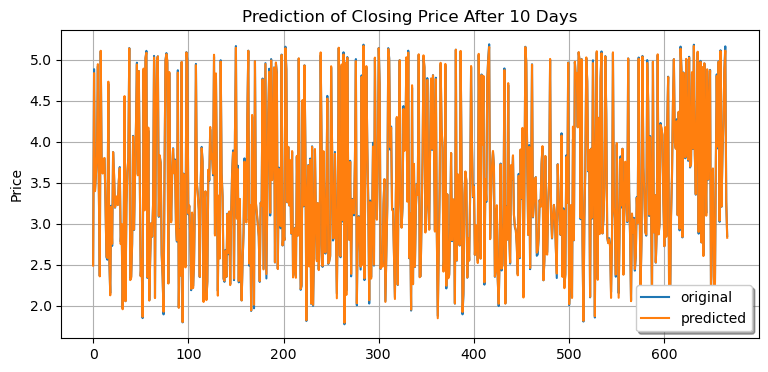

In [42]:
# visualizing in a plot
def plottingTheDifferenceBetweenPredictionAndActualValues(targetOutputVariable_Test, predictedOutputValues):
    x_ax = range(len(targetOutputVariable_Test))
    plt.figure(figsize=(9, 4))
    plt.plot(x_ax, targetOutputVariable_Test, label="original")
    plt.plot(x_ax, predictedOutputValues, label="predicted")
    plt.title("Prediction of Closing Price After 10 Days")
    
    plt.ylabel('Price')
    plt.legend(loc='best',fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

plottingTheDifferenceBetweenPredictionAndActualValues(targetOutputVariable_Test10Days, predictedOutputValues10Days)

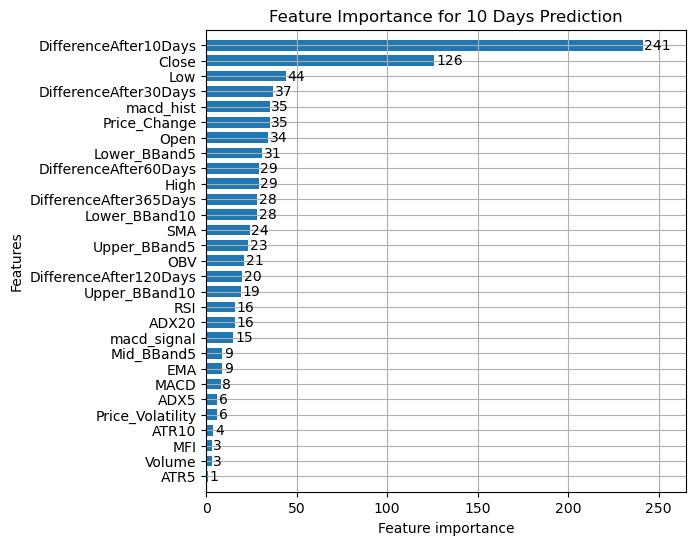

In [43]:
# plotting feature importance
def featureImportancePlot(model,title):
    fig, ax = plt.subplots(figsize=(8,6))
    lgb.plot_importance(model, ax=ax, height=.70)
    ax.set_title(title)
    # adjust the spacing between the y-axis and the left edge of the plot
    plt.subplots_adjust(left=0.3)
    plt.show()

featureImportancePlot(model10Days,'Feature Importance for 10 Days Prediction')